## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Importing the Dataset

In [6]:
wine_df = pd.read_csv('WineQT - WineQT.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
wine_df.columns
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Pre Processing the Data

In [8]:
wine_df['quality_label'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)
wine_df.drop(columns=['quality', 'Id'], inplace=True)  # Dropping original quality and ID column

In [5]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Train Test and Splitting the Data

In [9]:
X = wine_df.drop(columns=['quality_label'])
y = wine_df['quality_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

## Loading and Training the Data

In [10]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

## Calculating and Plotting the metrics

In [11]:
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

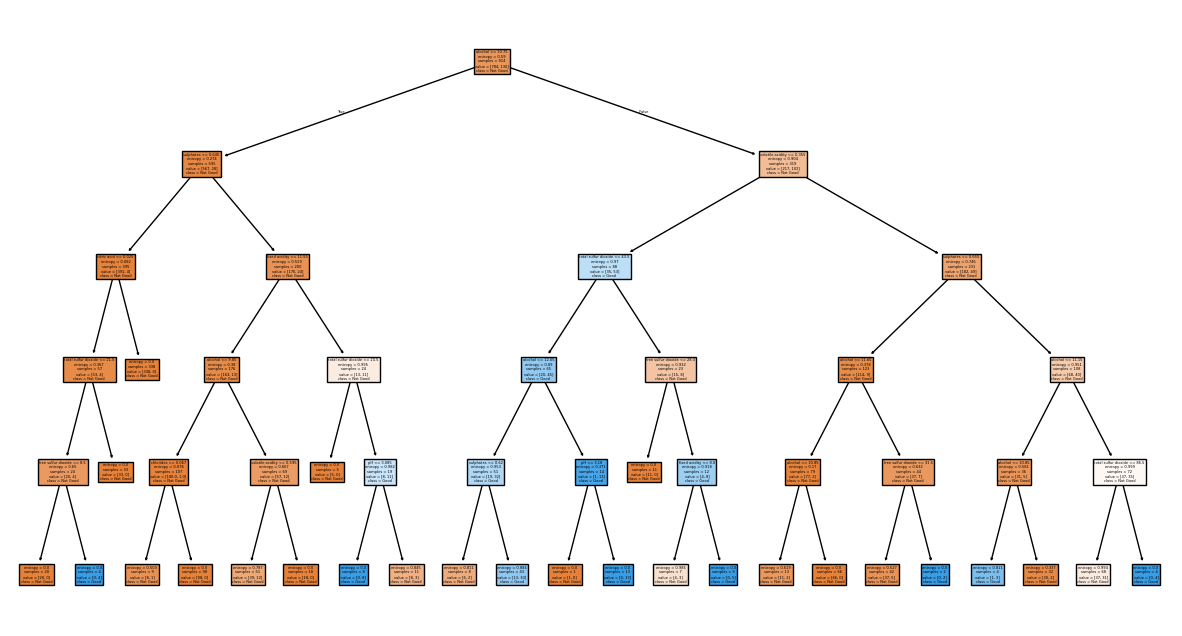

In [9]:
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Good', 'Good'], filled=True)
plt.show()

In [12]:
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 0.86
Precision: 0.43
Recall: 0.31
F1-Score: 0.36
Confusion Matrix:
[[188  12]
 [ 20   9]]


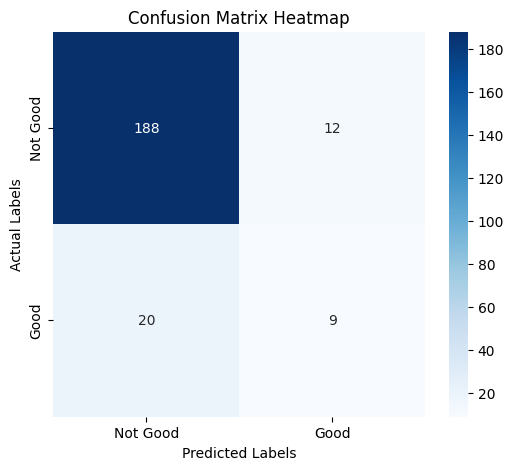

In [13]:
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Good', 'Good'], yticklabels=['Not Good', 'Good'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

##Conclusion:

The decision tree model achieved an accuracy of 86%, indicating strong overall performance.
However, a closer look at the evaluation metrics reveals some limitations.

- **Precision (43%) and Recall (31%)**: The model struggles with correctly identifying "Good" quality wines.
  A low recall suggests that many actual "Good" wines were misclassified as "Not Good," leading to a high false negative rate.
- **Confusion Matrix Analysis**: The model correctly classified most "Not Good" wines (188 out of 200) but misclassified 20 out of 29 "Good" wines.
  This indicates a bias toward predicting wines as "Not Good," possibly due to an imbalance in the dataset.
- **Decision Tree Insights**: The tree structure highlights key features that influence classification. However, limiting depth to avoid overfitting may
  have restricted the model’s ability to fully capture complex patterns in the data.

### Strengths:
- The model is interpretable and easy to visualize, making it useful for understanding key factors affecting wine quality.
- Achieves high accuracy in classifying "Not Good" wines.

### Weaknesses:
- Struggles with correctly identifying "Good" wines, leading to lower recall.
- Potential bias towards the majority class.
- Further improvements could be made by balancing the dataset or using ensemble techniques like Random Forest.

Future work could focus on hyperparameter tuning, feature selection, and ensemble methods to improve classification performance.